## <b> Walmart Retail Data Analysis and Sales Forecasting </b>
Link to dataset: https://www.kaggle.com/datasets/rutuspatel/walmart-dataset-retail/data


<b>About dataset</b><br>

Historical sales data for 45 Walmart stores located in different regions are available. There are certain events and holidays which impact sales on each day. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to inappropriate machine learning algorithm. Walmart would like to predict the sales and demand accurately.

<ul>
    <li>Store - the store number</li>
    <li>Date - the week of sales</li>
    <li>Weekly_Sales - sales for the given store</li>
    <li>Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week</li>
    <li>Temperature - Temperature on the day of sale</li>
    <li>Fuel_Price - Cost of fuel in the region</li>
    <li>CPI – Prevailing consumer price index</li>
    <li>Unemployment - Prevailing unemployment rate</li>
</ul>

## Holiday Events

<ul>
  <li>Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13</li>
  <li>Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13</li>
  <li>Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13</li>
  <li>Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13</li>
</ul>



In [301]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.inspection import permutation_importance


In [302]:
df = pd.read_csv("Walmart_Store_sales.csv")

In [303]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [305]:
# Aggregate total sales per store
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

In [306]:
# Checking Unique store values
df["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [307]:
store_sales.head(50).sort_values(ascending=False)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

## Total Sales by Store (Cumulative Over Weeks)

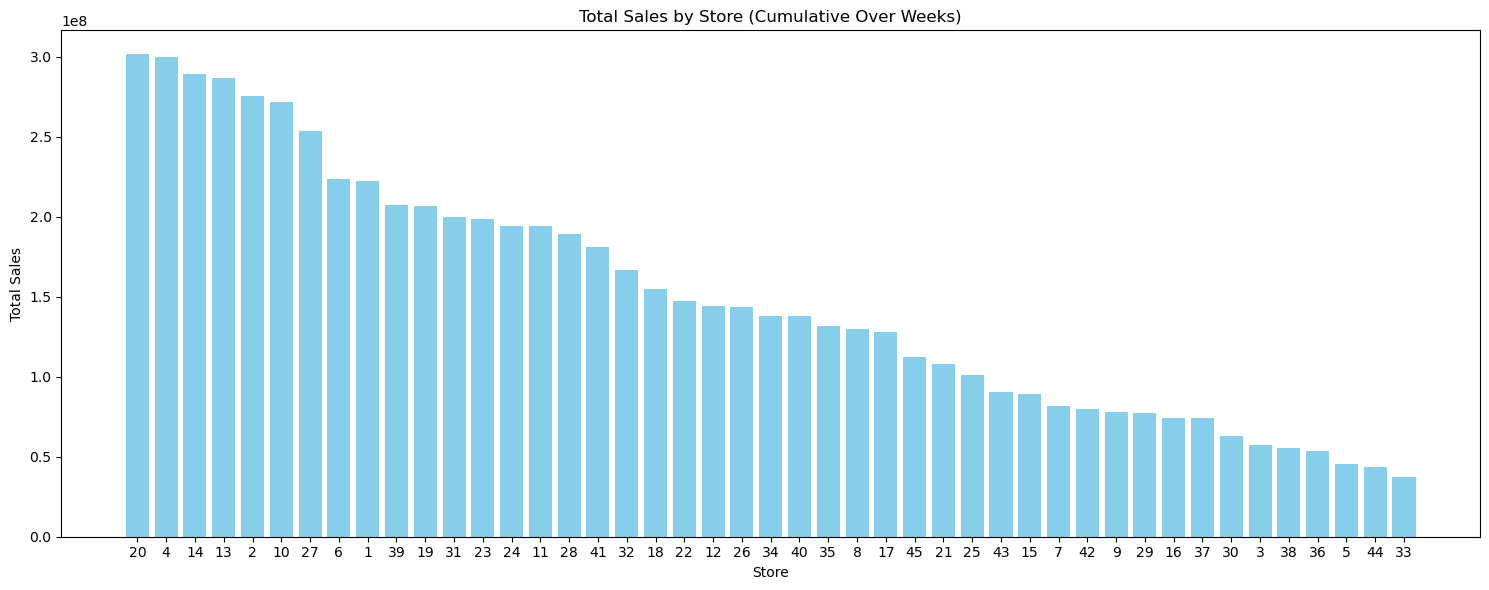

In [308]:
plt.figure(figsize=(15, 6))
plt.bar(store_sales.index.astype(str), store_sales.values, color='skyblue')

plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.title("Total Sales by Store (Cumulative Over Weeks)")
# plt.xticks(rotation=90)  # Rotate if many stores
plt.tight_layout()
plt.show()


<h5> Store 20 has the highest sales and a C.V of 13.09% </h5>

## Store's Standard Deviation

In [309]:
# Group by Store and calculate standard deviation of weekly sales
store_std = df.groupby("Store")["Weekly_Sales"].std().sort_values(ascending=False).round(2)

print(store_std)

Store
14    317569.95
10    302262.06
20    275900.56
4     266201.44
13    265507.00
23    249788.04
27    239930.14
2     237683.69
39    217466.45
6     212525.86
35    211243.46
19    191722.64
41    187907.16
28    181758.97
18    176641.51
24    167745.68
11    165833.89
22    161251.35
1     155980.77
12    139166.87
32    138017.25
45    130168.53
21    128752.81
31    125855.94
15    120538.65
40    119002.11
25    112976.79
7     112585.47
17    112162.94
26    110431.29
8     106280.83
34    104630.16
29     99120.14
16     85769.68
9      69028.67
36     60725.17
42     50262.93
3      46319.63
38     42768.17
43     40598.41
5      37737.97
44     24762.83
33     24132.93
30     22809.67
37     21837.46
Name: Weekly_Sales, dtype: float64


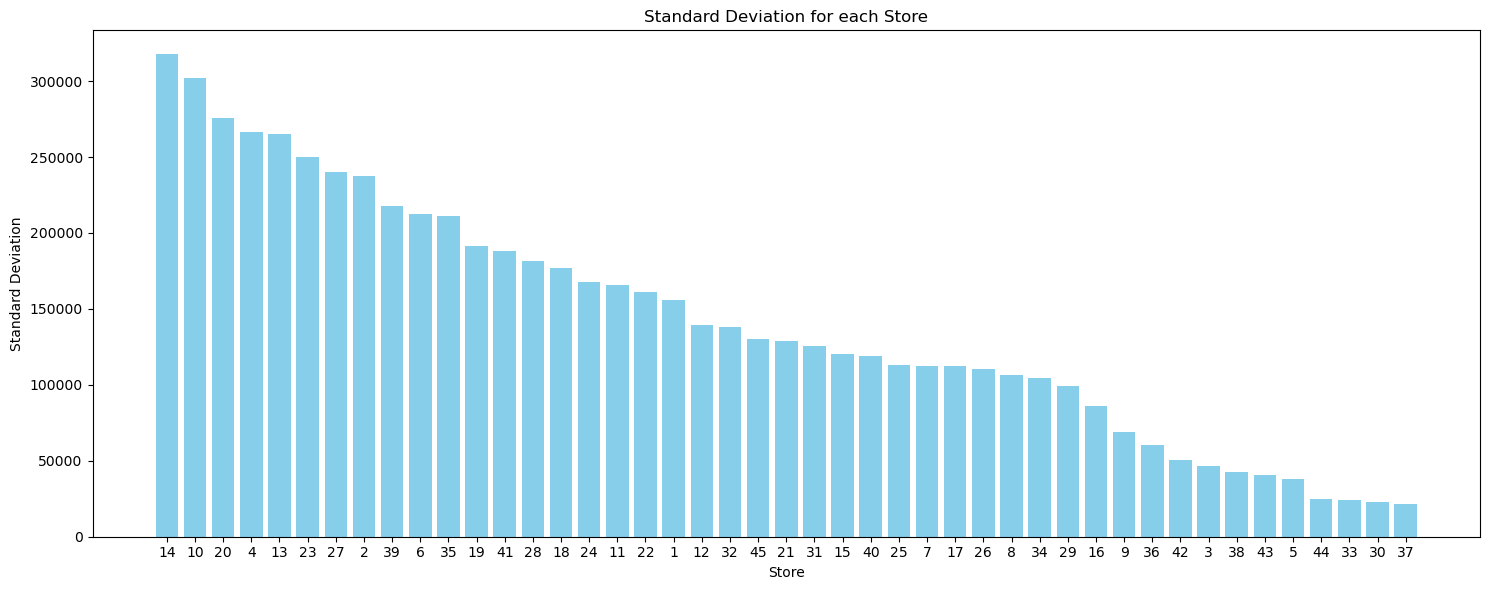

In [310]:
# Plotting the standard deviation for each store
plt.figure(figsize=(15, 6))
plt.bar(store_std.index.astype(str), store_std, color='skyblue')

plt.xlabel("Store")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation for each Store")
plt.tight_layout()
plt.show()


<p>Store 14 has the highest standard deviation, with a std of <b> 317569.95</b> and a Coefficient of Variation of <b>15.71%</b></p>

## Coefficient of Variation
<b>Defination:</b> Coefficient of variation (CV) is a useful metric when you want to compare variability across datasets that may have different units or scales.

<b>Interpretation:</b><br>
Stores with a high CV = highly variable sales compared to their average<br>
Stores with a low CV = more predictable or stable

In [311]:
# Group by store: get mean and std
stores_coefficient_of_variation = df.groupby("Store")["Weekly_Sales"].agg(['mean', 'std'])

# Add coefficient of variation
stores_coefficient_of_variation['cv'] = (stores_coefficient_of_variation['std'] / stores_coefficient_of_variation['mean']) * 100
stores_coefficient_of_variation = stores_coefficient_of_variation.sort_values('cv', ascending=False).round(2)
print(stores_coefficient_of_variation)


             mean        std     cv
Store                              
35      919724.98  211243.46  22.97
7       570617.31  112585.47  19.73
15      623312.47  120538.65  19.34
29      539451.43   99120.14  18.37
23     1389864.46  249788.04  17.97
21      756069.08  128752.81  17.03
45      785981.41  130168.53  16.56
16      519247.73   85769.68  16.52
18     1084718.42  176641.51  16.28
36      373511.99   60725.17  16.26
25      706721.53  112976.79  15.99
10     1899424.57  302262.06  15.91
14     2020978.40  317569.95  15.71
22     1028501.04  161251.35  15.68
39     1450668.13  217466.45  14.99
41     1268125.42  187907.16  14.82
12     1009001.61  139166.87  13.79
28     1323522.24  181758.97  13.73
6      1564728.19  212525.86  13.58
27     1775216.20  239930.14  13.52
19     1444999.04  191722.64  13.27
13     2003620.31  265507.00  13.25
20     2107676.87  275900.56  13.09
4      2094712.96  266201.44  12.71
9       543980.55   69028.67  12.69
17      893581.39  112162.94

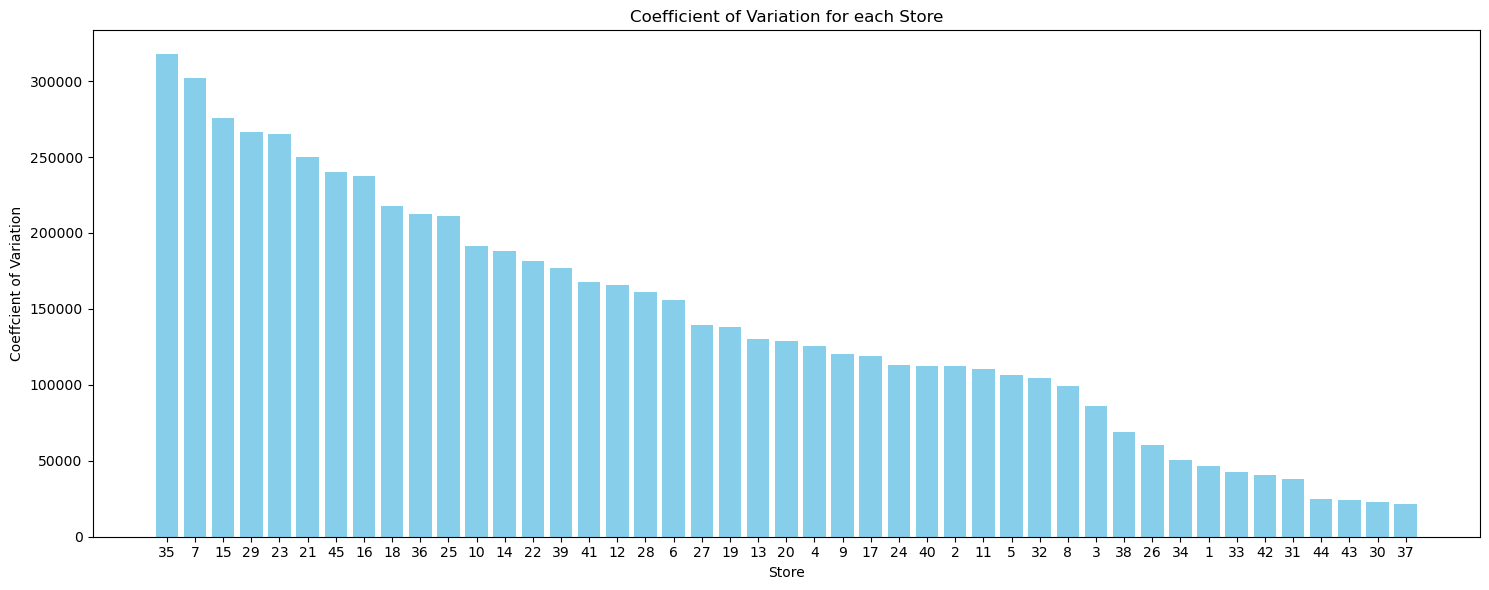

In [312]:
# Plotting the standard deviation for each store
plt.figure(figsize=(15, 6))
plt.bar(stores_coefficient_of_variation.index.astype(str), store_std, color='skyblue')

plt.xlabel("Store")
plt.ylabel("Coeffcient of Variation")
plt.title("Coefficient of Variation for each Store")
plt.tight_layout()
plt.show()


## Quarterly growth rate in Q3’2012

In [313]:
# Converting the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [314]:
q2_2012 = df[(df['Date'].dt.year == 2012) & (df['Date'].dt.quarter == 2)]
q3_2012 = df[(df['Date'].dt.year == 2012) & (df['Date'].dt.quarter == 3)]

q2_total = q2_2012.groupby('Store')['Weekly_Sales'].sum()
q3_total = q3_2012.groupby('Store')['Weekly_Sales'].sum()

growth_rate = ((q3_total - q2_total) / q2_total) * 100


In [315]:
growth_rate = growth_rate.sort_values(ascending=False).round(2)
print(growth_rate)

Store
7     13.33
16     8.49
35     4.47
26     3.96
39     2.48
41     2.46
44     2.43
24     1.65
40     1.14
23     0.83
38    -0.58
32    -0.60
19    -0.89
17    -1.06
37    -1.41
8     -1.43
11    -1.53
27    -1.92
43    -2.06
13    -2.18
25    -2.29
20    -2.30
4     -2.31
31    -2.52
30    -2.57
28    -2.58
34    -2.86
21    -2.87
18    -2.92
10    -3.00
2     -3.11
6     -3.20
33    -3.25
1     -3.45
42    -3.59
15    -4.31
22    -4.77
3     -5.73
12    -6.18
9     -6.18
29    -6.37
5     -6.77
36    -7.71
45    -7.79
14   -15.77
Name: Weekly_Sales, dtype: float64


### Stores that have good Q3 growth rate in 2012
- Store 7  - 13.33%
- Store 16 - 8.49%
- Store 35 - 4.47%
- Store 26 - 3.96%
- Store 39 - 2.48%
- Store 41 - 2.46%
- Store 44 - 2.43%
- Store 24 - 1.65%
- Store 40 - 1.14%
- Store 23 - 0.83%

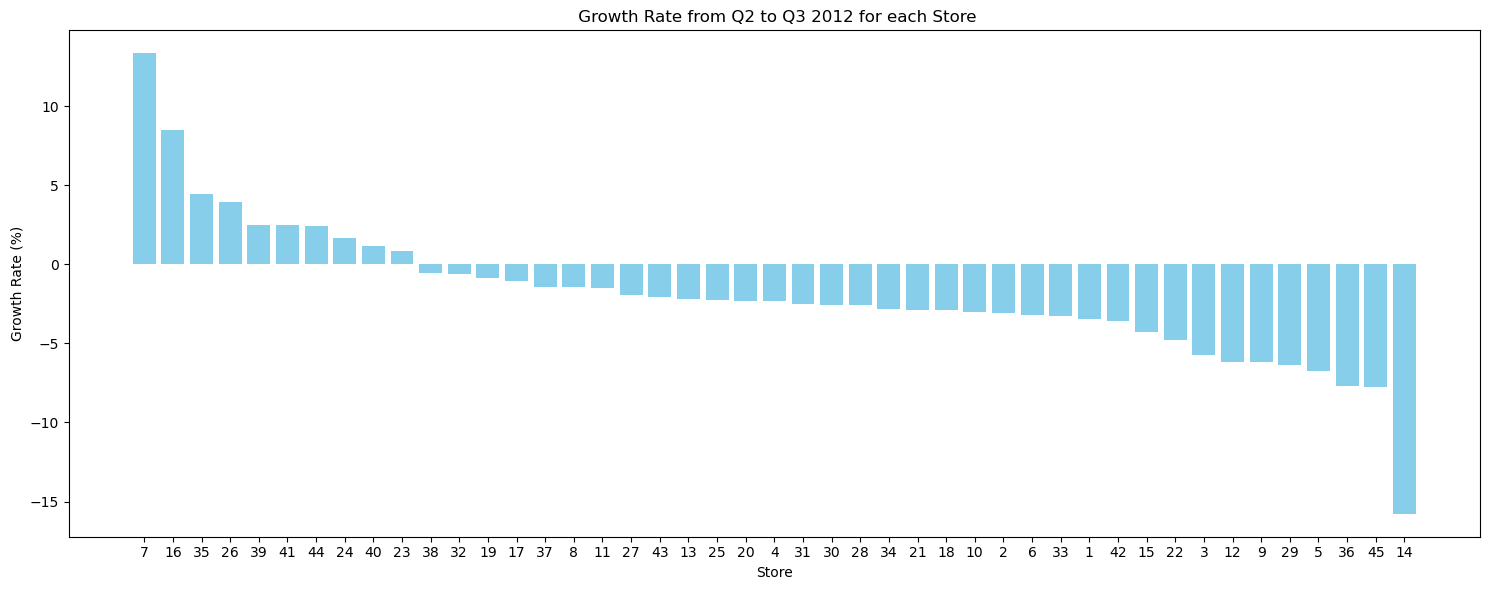

In [316]:
# Stores that have good Q3 growth rate in 2012
plt.figure(figsize=(15, 6))
plt.bar(growth_rate.index.astype(str), growth_rate, color='skyblue')

plt.xlabel("Store")
plt.ylabel("Growth Rate (%)")
plt.title(" Growth Rate from Q2 to Q3 2012 for each Store")
plt.tight_layout()
plt.show()

In [317]:
q3_avg = q3_2012.groupby('Store')['Weekly_Sales'].mean()
q2_avg = q3_2012.groupby('Store')['Weekly_Sales'].mean()

print(q3_avg)
print(q2_avg)

Store
1     1.557996e+06
2     1.869489e+06
3     4.075389e+05
4     2.138215e+06
5     3.202916e+05
6     1.551332e+06
7     6.355990e+05
8     9.037656e+05
9     5.401654e+05
10    1.772097e+06
11    1.347391e+06
12    9.643326e+05
13    2.032405e+06
14    1.629812e+06
15    5.855447e+05
16    5.478109e+05
17    9.584195e+05
18    1.037674e+06
19    1.400273e+06
20    2.068579e+06
21    6.944307e+05
22    9.880877e+05
23    1.433961e+06
24    1.382798e+06
25    7.006986e+05
26    1.051976e+06
27    1.715978e+06
28    1.236977e+06
29    5.131719e+05
30    4.303617e+05
31    1.369747e+06
32    1.184348e+06
33    2.641246e+05
34    9.604612e+05
35    8.709555e+05
36    2.947455e+05
37    5.175437e+05
38    4.311910e+05
39    1.593470e+06
40    9.902458e+05
41    1.391834e+06
42    5.612892e+05
43    6.154286e+05
44    3.393270e+05
45    7.370206e+05
Name: Weekly_Sales, dtype: float64
Store
1     1.557996e+06
2     1.869489e+06
3     4.075389e+05
4     2.138215e+06
5     3.202916e+05
6  

### Mean Sales for Non-Holiday weeks

In [318]:
weekly_sales = df[df['Holiday_Flag'] == 0].groupby('Date')['Weekly_Sales'].sum()

non_holiday_mean = weekly_sales.mean()
print("Mean total weekly sales during non-holidays:", non_holiday_mean)


Mean total weekly sales during non-holidays: 46856537.1093985


### Identifying Holiday weeks

In [319]:
holiday_weeks = df[df['Holiday_Flag'] == 1]['Date'].unique()


In [320]:
holiday_sales_summary = []

for date in holiday_weeks:
    total_sales = df[df['Date'] == date]['Weekly_Sales'].sum()
    holiday_sales_summary.append({'Date': date, 'Total_Sales': total_sales})
holiday_sales_df = pd.DataFrame(holiday_sales_summary)  

print(holiday_sales_df)

        Date  Total_Sales
0 2010-02-12  48336677.63
1 2010-09-10  45634397.84
2 2010-11-26  65821003.24
3 2010-12-31  40432519.00
4 2011-02-11  47336192.79
5 2011-09-09  46763227.53
6 2011-11-25  66593605.26
7 2011-12-30  46042461.04
8 2012-02-10  50009407.92
9 2012-09-07  48330059.31


In [321]:
# Filtering holidays where total sales > non-holiday mean
higher_sales_holidays = holiday_sales_df[holiday_sales_df['Total_Sales'] > non_holiday_mean]


In [322]:
# Mapping dates to known holidays
holiday_names = {
    '2010-02-12': 'Super Bowl',
    '2010-09-10': 'Labor Day',
    '2010-11-26': 'Thanksgiving',
    '2010-12-31': 'Christmas',
    '2011-02-11':  'Super Bowl',
    '2011-09-09':  'labor Day',
    '2011-11-25':  'Thanksgiving',
    '2011-12-30':  'Christmas',
    '2012-02-10':  'Super Bowl',
    '2012-09-07':  'Labor Day'
    # Add more as needed
}

higher_sales_holidays['Holiday_Name'] = higher_sales_holidays['Date'].astype(str).map(holiday_names)


C:\Users\USER\AppData\Local\Temp\ipykernel_7296\2907389266.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  higher_sales_holidays['Holiday_Name'] = higher_sales_holidays['Date'].astype(str).map(holiday_names)


## Holiday Weeks with Higher Sales than Non-Holiday Mean

In [323]:
print(higher_sales_holidays[['Date', 'Holiday_Name', 'Total_Sales']])


        Date  Holiday_Name  Total_Sales
0 2010-02-12    Super Bowl  48336677.63
2 2010-11-26  Thanksgiving  65821003.24
4 2011-02-11    Super Bowl  47336192.79
6 2011-11-25  Thanksgiving  66593605.26
8 2012-02-10    Super Bowl  50009407.92
9 2012-09-07     Labor Day  48330059.31


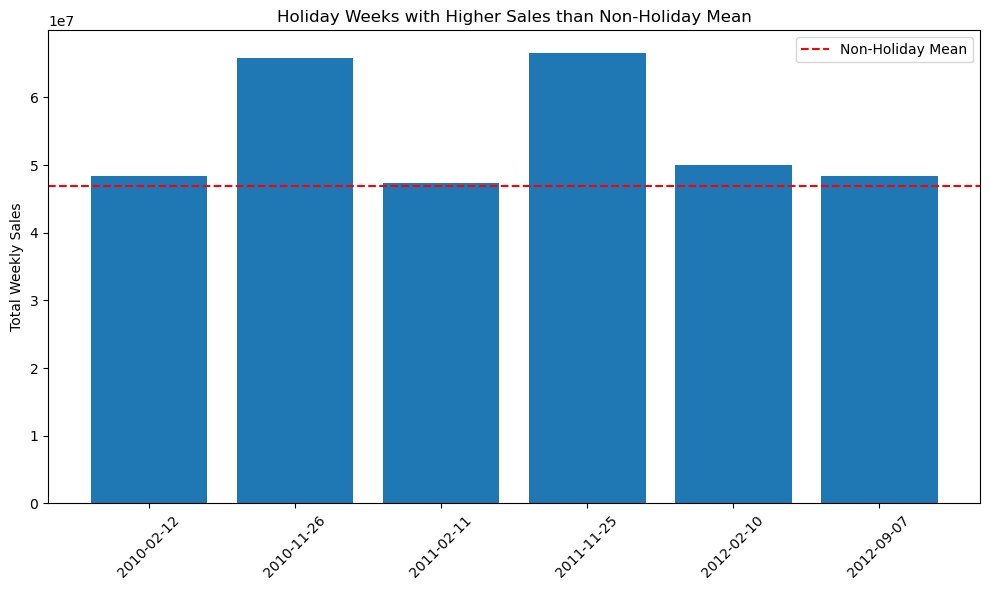

In [324]:
# Plotting the holidays with higher sales than non-holiday mean
plt.figure(figsize=(10, 6))
plt.bar(higher_sales_holidays['Date'].astype(str), higher_sales_holidays['Total_Sales'])
plt.axhline(non_holiday_mean, color='red', linestyle='--', label='Non-Holiday Mean')
plt.xticks(rotation=45)
plt.title("Holiday Weeks with Higher Sales than Non-Holiday Mean")
plt.ylabel("Total Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()


## Monthly and Semester view of sales in units

In [325]:
# Creating Month and Year columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [326]:
# Grouping and summing by Year & Month
monthly_sales = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()
monthly_sales['Month_Year'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str) + '-01')

In [327]:
monthly_sales.head()

,Year,Month,Weekly_Sales,Month_Year
0,2010,2,1.903330e+08,2010-02-01
1,2010,3,1.819198e+08,2010-03-01
2,2010,4,2.314124e+08,2010-04-01
3,2010,5,1.867109e+08,2010-05-01
4,2010,6,1.922462e+08,2010-06-01


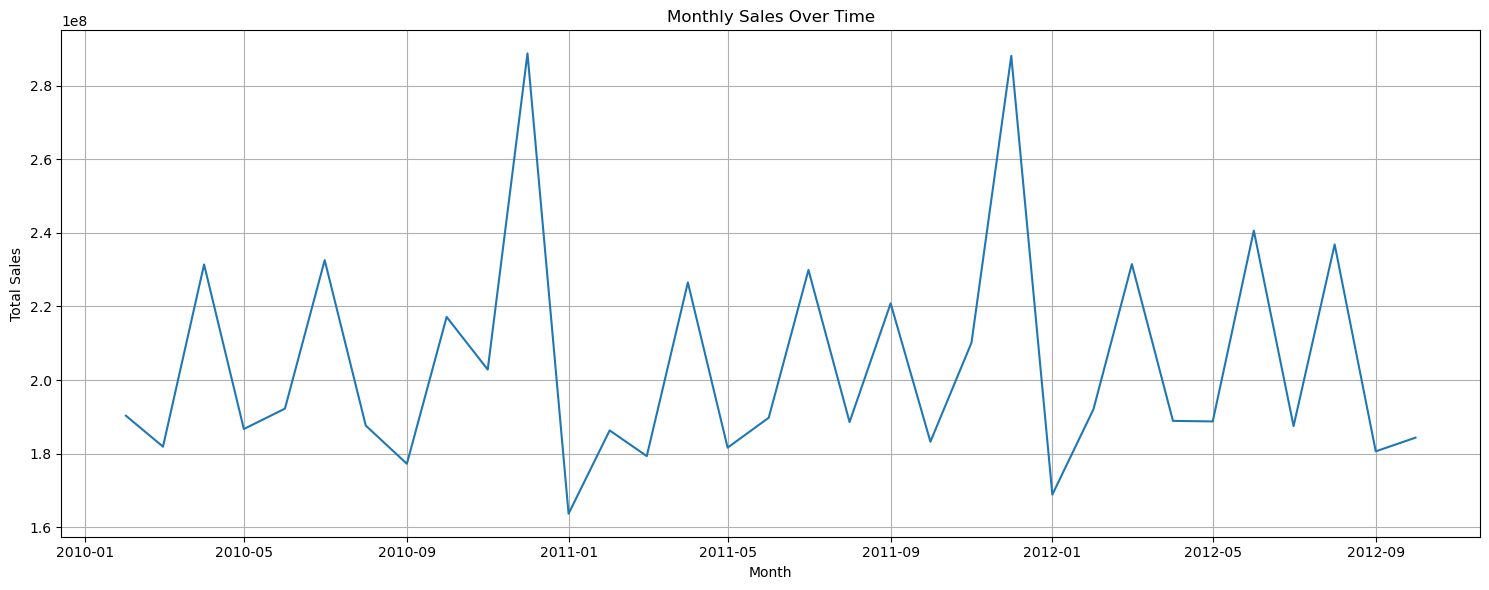

In [328]:
# Plotting monthly sales
plt.figure(figsize=(15,6))
plt.plot(monthly_sales['Month_Year'], monthly_sales['Weekly_Sales'])
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Monthly Trend Analysis

- There is a consistent peak in sales around december from 2010 to 2011, this could be mainly as a result of the Christmas Holidays.
- There is also a consistent spike in sales around April from 2010 -2012 and then a dip of sales in May,
- The month of July has high sales all through from 2010-2012



### Semester Sales View

There are 2 semesters per year:
- Semester 1 (H1): Jan–Jun <br>
- Semester 2 (H2): Jul–Dec

In [329]:
# Creating Semester column
df['Semester'] = df['Date'].dt.month.apply(lambda x: 'H1' if x <= 6 else 'H2')

In [330]:
# Grouping and summing by Year and 

semester_sales = df.groupby(['Year', 'Semester'])['Weekly_Sales'].sum().reset_index()
semester_sales['Year_Semester'] = semester_sales['Year'].astype(str) + '-' + semester_sales['Semester']

print(semester_sales.head(50))

   Year Semester  Weekly_Sales Year_Semester
0  2010       H1  9.826223e+08       2010-H1
1  2010       H2  1.306264e+09       2010-H2
2  2011       H1  1.127340e+09       2011-H1
3  2011       H2  1.320860e+09       2011-H2
4  2012       H1  1.210765e+09       2012-H1
5  2012       H2  7.893674e+08       2012-H2


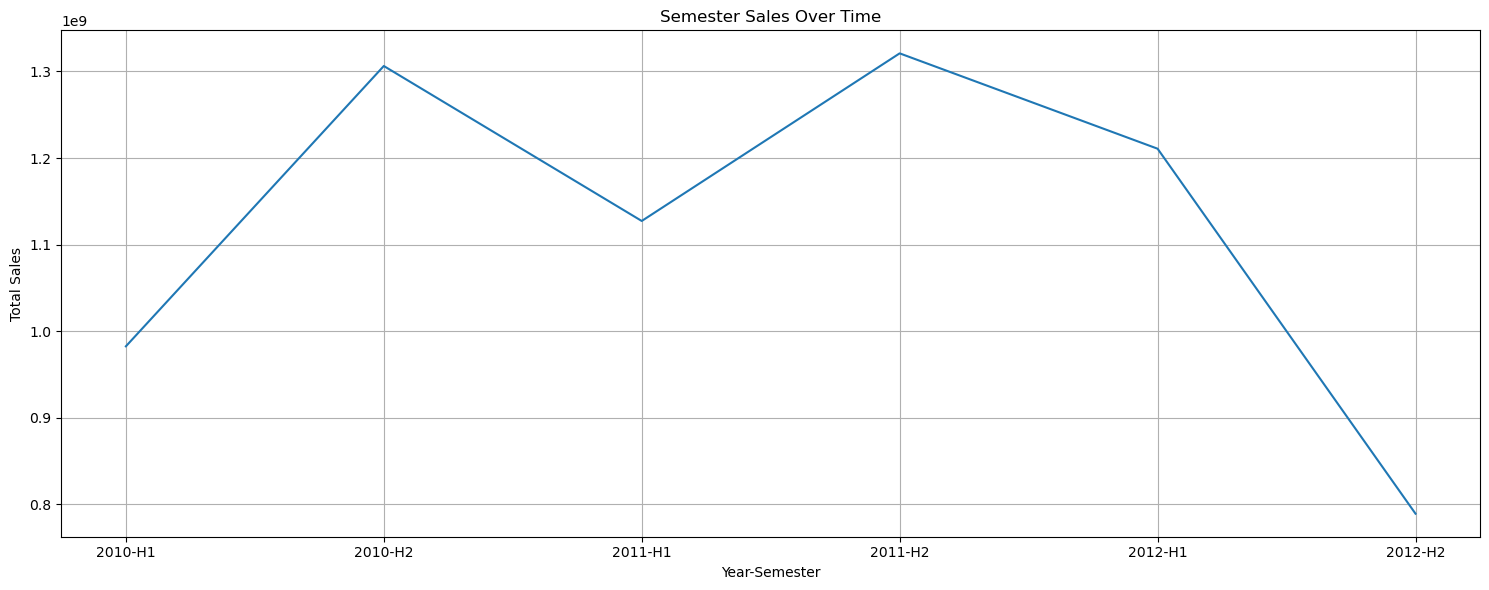

In [331]:
# Plotting semester sales
plt.figure(figsize=(15,6))
plt.plot(semester_sales['Year_Semester'], semester_sales['Weekly_Sales'])
plt.title('Semester Sales Over Time')
plt.xlabel('Year-Semester')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Semester Trend Analysis

- There is a consistent increase in sales in the second half (H2) from 2010-2011, but there is a huge decline on sales in 2012, and this could be beacuse the 2012 sales record ends in October and not December, which usually accounts for much of the sales.
- In general, H2 tends to have higher sales than H1.


## Prediction Model to Predict Demand for Store 1

In [332]:
store1_df = df[df['Store'] == 1].copy()
store1_df.sort_values('Date', inplace=True)
store1_df.reset_index(drop=True, inplace=True)



## Feature Engineering for Store 1

In [333]:
store1_df['Month'] = store1_df['Date'].dt.month
store1_df['Week'] = store1_df['Date'].dt.isocalendar().week
store1_df['DayOfWeek'] = store1_df['Date'].dt.dayofweek

# Lag features
store1_df['Lag_1'] = store1_df['Weekly_Sales'].shift(1)
store1_df['Lag_2'] = store1_df['Weekly_Sales'].shift(2)

""" It gives the average sales for the last 4 weeks, helping smooth out short-term fluctuations.
Why this is useful:
It gives the model a sense of general trend — not just what happened 1 week ago, but the overall recent trend.

"""
store1_df['MA_4'] = store1_df['Weekly_Sales'].rolling(window=4).mean() 


In [334]:
store1_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Semester,Week,DayOfWeek,Lag_1,Lag_2,MA_4
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,H1,5,4,NaN,NaN,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,H1,6,4,1643690.90,NaN,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,H1,7,4,1641957.44,1643690.90,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,H1,8,4,1611968.17,1641957.44,1576836.025
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,H1,9,4,1409727.59,1611968.17,1554614.970


In [335]:
store1_df["DayOfWeek"].unique()

array([4], dtype=int32)

In [336]:
store1_df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,DayOfWeek,Lag_1,Lag_2,MA_4
count,143.0,143,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.0,1.420000e+02,1.410000e+02,1.400000e+02
mean,1.0,2011-06-17 00:00:00,1.555264e+06,0.069930,68.306783,3.219699,215.996892,7.610420,2010.965035,6.447552,25.818182,4.0,1.555698e+06,1.556036e+06,1.554847e+06
min,1.0,2010-02-05 00:00:00,1.316899e+06,0.000000,35.400000,2.514000,210.337426,6.573000,2010.000000,1.000000,1.0,4.0,1.316899e+06,1.316899e+06,1.370013e+06
25%,1.0,2010-10-11 12:00:00,1.458105e+06,0.000000,58.265000,2.764500,211.549277,7.348000,2010.000000,4.000000,14.0,4.0,1.457452e+06,1.456800e+06,1.480546e+06
50%,1.0,2011-06-17 00:00:00,1.534850e+06,0.000000,69.640000,3.290000,215.459905,7.787000,2011.000000,6.000000,26.0,4.0,1.537119e+06,1.539388e+06,1.537190e+06
75%,1.0,2012-02-20 12:00:00,1.614892e+06,0.000000,80.485000,3.594000,220.531330,7.838000,2012.000000,9.000000,37.5,4.0,1.615208e+06,1.615525e+06,1.597304e+06
max,1.0,2012-10-26 00:00:00,2.387950e+06,1.000000,91.650000,3.907000,223.444251,8.106000,2012.000000,12.000000,52.0,4.0,2.387950e+06,2.387950e+06,1.883783e+06
std,0.0,NaN,1.559808e+05,0.255926,14.250486,0.427313,4.350890,0.383749,0.799759,3.249438,14.177763,0.0,1.564463e+05,1.569521e+05,9.973359e+04


In [337]:
# Calculate the 80th percentile date
percentile_80_date = store1_df['Date'].quantile(0.9)

print("80th percentile date:", percentile_80_date)


80th percentile date: 2012-07-18 14:24:00


### Train-Test Split

In [338]:
train = store1_df[store1_df['Date'] <= '2012-07-18']
test = store1_df[store1_df['Date'] > '2012-07-18']


In [339]:
print(train['Weekly_Sales'].describe())


count    1.280000e+02
mean     1.556251e+06
std      1.630349e+05
min      1.316899e+06
25%      1.455113e+06
50%      1.537119e+06
75%      1.616901e+06
max      2.387950e+06
Name: Weekly_Sales, dtype: float64


### Model Training (Using XGBoost)

<h5> What is XGBoost?</h5>
<p> XGBoost stands for Extreme Gradient Boosting.

- It's a powerful machine learning algorithm used for regression, classification, and ranking problems.

- It's one of the most accurate, efficient, and fast algorithms for tabular data (like your walmart dataset).</p>

### Feature and Target Split

In [340]:
features = ['Month', 'Week', 'Holiday_Flag', 'CPI', 'Unemployment', 'Fuel_Price', 'Lag_1', 'Lag_2', 'MA_4']
train = train.dropna()  # Remove NA due to lags/rolling
test = test.dropna()

In [341]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(train[features], train['Weekly_Sales'])


preds = model.predict(test[features])
mse = mean_squared_error(test['Weekly_Sales'], preds)

""" Root Mean Squared Error (RMSE) takes the square root of the MSE.

RMSE is a better metric to interpret because it's in the same unit as the original data (weekly_sales).

"""
rmse = np.sqrt(mse) # RMSE tells you the average prediction error (how far off your model is, in sales dollars):
r2 = r2_score(test["Weekly_Sales"], preds)
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")



RMSE: 88777.06504374174
R2 Score: -0.5163293543377079


### Checking Feature importance

- <b>Feature importance</b> tells you how much each input feature contributes to the predictions of a model.
- But the meaning of "importance" depends on the model type:

 <h4> A. In Tree-Based Models (e.g., XGBoost, RandomForest) </h4>

- Feature importance is computed based on how often and how effectively a feature is used to make splits:

- a. <b>weight:</b> Number of times a feature is used in all trees
- b. <b>gain:</b>	Average reduction in error when the feature is used
- c. <b>cover:</b>	Number of samples affected by the splits using this feature

<h4> B. In Linear Models (e.g., Linear Regression) </h4>
- <b>Importance</b> = magnitude of the coefficients (assuming the features are standardized).

- <b>Positive coefficient:</b> → Feature increases prediction.
- <b>Negative coefficient:</b> → Feature decreases prediction.

-  <b>Note:</b> 
- Near-zero → Low impact.
- ⚠️ Coefficients are sensitive to scale, so always standardize features before interpretation.

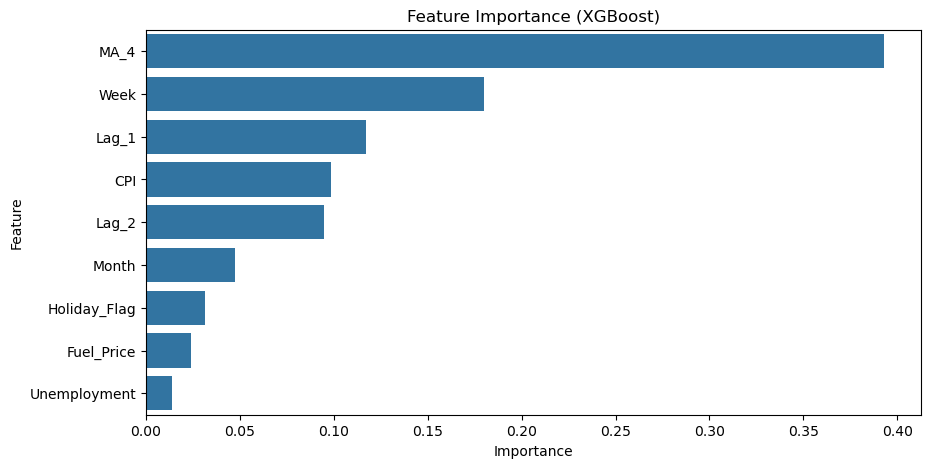

In [342]:
# After fitting your XGBoost model
feature_importance = model.feature_importances_
features_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=features_df, x='Importance', y='Feature')
plt.title("Feature Importance (XGBoost)")
plt.show()


#### Permutation Importance

- Permutation Importance is a model-agnostic (Works with any model (trees, neural nets, regressors, etc.) way to measure feature importance. </h6>

- 💡 How it works:
1. Calculate baseline model performance (e.g., R² or RMSE).
2. Randomly shuffle the values of one feature.
3. Measure the drop in performance.
4. The bigger the drop, the more important the feature.

<h5> <b>Advantages of Permutation Importance </b> </h5>

| Benefit                   | Why it matters                                                                   |
| ------------------------- | -------------------------------------------------------------------------------- |
| Model-agnostic            | Works with any model (trees, neural nets, regressors, etc.)                      |
| Accounts for interactions | It can detect importance even if the feature is only useful in combo with others |
| More reliable             | Doesn't favor variables with more categories or higher variance                  |


### Safe Elimination of low permutation Features

C:\Users\USER\AppData\Local\Temp\ipykernel_7296\2150235899.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=perm_df, palette='plasma', legend=False)


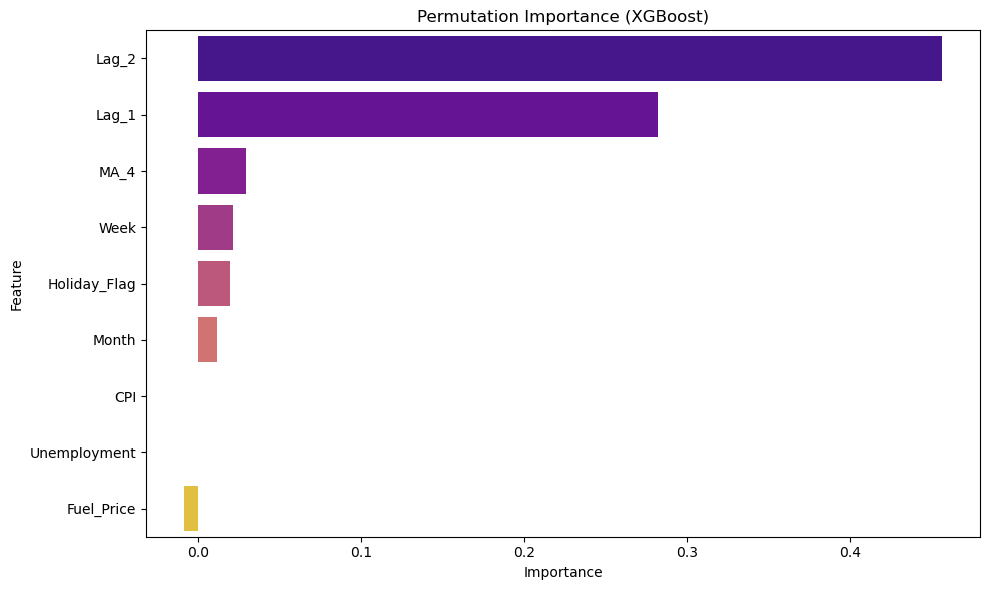

In [343]:

result = permutation_importance(model, test[features], test["Weekly_Sales"], n_repeats=10, random_state=42)

perm_df = pd.DataFrame({
    'Feature': features,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_df, palette='plasma', legend=False)
plt.title("Permutation Importance (XGBoost)")
plt.tight_layout()
plt.show()


### Dropping Low permutation features

In [344]:
# Select low-importance features
low_imp_features = perm_df[perm_df['Importance'] < 0.005]['Feature'].tolist()

print("Consider dropping these:", low_imp_features)

Consider dropping these: ['CPI', 'Unemployment', 'Fuel_Price']


### XGBoost Model after dropping low permutation features

In [345]:
# Dropping low-importance features and retrain
features_reduced = [f for f in features if f not in low_imp_features]

model_reduced = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_reduced.fit(train[features_reduced], train['Weekly_Sales'])

# Step 6: Re-evaluate
preds_reduced = model_reduced.predict(test[features_reduced])
mse_reduced = mean_squared_error(test['Weekly_Sales'], preds_reduced)
rmse_reduced = np.sqrt(mse_reduced)
r2_reduced = r2_score(test['Weekly_Sales'], preds_reduced)

print("\n✅ Reduced Model Performance:")
print(f"RMSE: {rmse_reduced:.2f}")
print(f"R² Score: {r2_reduced:.4f}")




✅ Reduced Model Performance:
RMSE: 87072.35
R² Score: -0.4587


### <b> Hyperparameter Tuning </b>

<p>Hyperparameter tuning is the process of finding the best combination of settings (called hyperparameters) that control how a machine learning model learns from data.<p>

<b>🔧 What's the difference between parameters and hyperparameters?</b>


| Term               | Description                                            | Example                                                       |
| ------------------ | ------------------------------------------------------ | ------------------------------------------------------------- |
| **Parameter**      | Learned from the data during training                  | The weights in linear regression, decision thresholds, etc.   |
| **Hyperparameter** | Set **before** training; controls the learning process | `learning_rate`, `n_estimators`, `max_depth`, etc. in XGBoost |


<br>

✅ <b> Why is tuning important? </b>
<p>Different combinations of hyperparameters can produce very different model performance. Tuning helps you:</p>

- Improve accuracy or reduce error (like RMSE)
- Prevent overfitting or underfitting
- Get the most out of your model


<h5> Example (for XGBoost) </h5>

| Hyperparameter     | Meaning                                                                        |
| ------------------ | ------------------------------------------------------------------------------ |
| `n_estimators`     | Number of trees (more trees = better fit, slower training)                     |
| `learning_rate`    | How much each tree corrects the last (smaller = slower but more accurate)      |
| `max_depth`        | How deep each tree goes (deeper trees = more complex rules)                    |
| `subsample`        | Fraction of training data used per tree (helps avoid overfitting)              |
| `colsample_bytree` | Fraction of features used per tree (adds randomness to improve generalization) |

<br><br>
<b> How do we tune hyperparameters? </b>
- You try many combinations using methods like:

1. Grid Search – try all combinations (slow but thorough)
2. Random Search – randomly try some combinations (faster)
3. Bayesian Optimization – smartly guesses the next best combination
4. Optuna / Hyperopt / Skopt – advanced tools for automatic tuning

- The code below is performing randomized hyperparameter tuning by:

1. Randomly testing different combinations from param_grid
2. Using cross-validation (cv=3) to evaluate each combo
3. Picking the one with the lowest error (best model)



<b> What is Cross Validation </b>
<p> <b>Cross-validation (CV)</b> is a technique used to evaluate the performance of a machine learning model more reliably by splitting the dataset into multiple parts and training/testing on different splits.</p>

- 🎯 Why do we use it?
1. To reduce overfitting during model evaluation.
2. To get a better estimate of how your model will perform on unseen data.
3. Because a single train/test split might give a misleading result due to randomness.

- 🧠 How does it work?
- The most common type is k-Fold Cross-Validation:
1. Split your dataset into k equal parts (called folds), e.g. 5.
-For each fold:
2. Use that fold as the test set
3. Use the other k−1 folds as the training set
4. Train the model and evaluate it
5. Average the results (e.g. RMSE or R² score) across all folds.

* This gives you a much more robust estimate of model performance than just one train/test split.

In [346]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

search = RandomizedSearchCV(XGBRegressor(), param_grid, cv=3, scoring='neg_mean_squared_error')
search.fit(train[features_reduced], train['Weekly_Sales'])

best_model = search.best_estimator_


In [347]:
print("Best Hyperparameters:")
print(search.best_params_)

Best Hyperparameters:
{'subsample': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


In [348]:
results_df = pd.DataFrame(search.cv_results_)
print(results_df[['params', 'mean_test_score', 'rank_test_score']])


                                              params  mean_test_score  \
0  {'subsample': 0.8, 'n_estimators': 100, 'max_d...    -9.781205e+09   
1  {'subsample': 0.8, 'n_estimators': 500, 'max_d...    -9.745588e+09   
2  {'subsample': 1, 'n_estimators': 500, 'max_dep...    -9.182422e+09   
3  {'subsample': 1, 'n_estimators': 500, 'max_dep...    -9.412388e+09   
4  {'subsample': 0.8, 'n_estimators': 300, 'max_d...    -1.015094e+10   
5  {'subsample': 1, 'n_estimators': 300, 'max_dep...    -9.203039e+09   
6  {'subsample': 0.8, 'n_estimators': 100, 'max_d...    -1.179736e+10   
7  {'subsample': 1, 'n_estimators': 500, 'max_dep...    -1.157864e+10   
8  {'subsample': 1, 'n_estimators': 500, 'max_dep...    -1.049638e+10   
9  {'subsample': 0.8, 'n_estimators': 100, 'max_d...    -1.840616e+10   

   rank_test_score  
0                5  
1                4  
2                1  
3                3  
4                6  
5                2  
6                9  
7                8  
8      

In [349]:
# Dropping low-importance features and retrain
features_reduced = [f for f in features if f not in low_imp_features]

# model_reduced = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_reduced = XGBRegressor(subsample=1, n_estimators=100, max_depth = 3, learning_rate = 0.1, colsample_bytree = 0.7)
model_reduced.fit(train[features_reduced], train['Weekly_Sales'])

# Re-evaluating
preds_reduced = model_reduced.predict(test[features_reduced])
mse_reduced = mean_squared_error(test['Weekly_Sales'], preds_reduced)
rmse_reduced = np.sqrt(mse_reduced)
r2_reduced = r2_score(test['Weekly_Sales'], preds_reduced)

print("\n✅ Reduced Model Performance:")
print(f"RMSE: {rmse_reduced:.2f}")
print(f"R² Score: {r2_reduced:.4f}")



✅ Reduced Model Performance:
RMSE: 80949.42
R² Score: -0.2607


### Retraining the XGBoost model, taking into account Seasonality.

In [350]:
from pandas.tseries.offsets import Day



# STEP 1: Feature Engineering on store1_df
# Extracting Time Components from Date

store1_df['Date'] = pd.to_datetime(store1_df['Date'])         # Making sure 'Date' is in datetime format
store1_df['Month'] = store1_df['Date'].dt.month               # Extracting month as a number (1 to 12)
store1_df['WeekOfYear'] = store1_df['Date'].dt.isocalendar().week  # Extracting week number of the year (1 to 52)
store1_df['Year'] = store1_df['Date'].dt.year                 # Extracting the year (e.g., 2010, 2011)


# Cyclic Encoding for Month & Week
store1_df['Month_sin'] = np.sin(2 * np.pi * store1_df['Month'] / 12)
store1_df['Month_cos'] = np.cos(2 * np.pi * store1_df['Month'] / 12)
store1_df['Week_sin'] = np.sin(2 * np.pi * store1_df['WeekOfYear'] / 52)
store1_df['Week_cos'] = np.cos(2 * np.pi * store1_df['WeekOfYear'] / 52)


""" Why? Month and week are cyclical — December is followed by January, and Week 52 wraps to Week 1.
Using sin and cos lets the model understand this circular nature.
Otherwise, the model might think January (1) and December (12) are far apart."""


# ✅ Full Holiday Dates from 2010 to 2013
holiday_dates = {
    'Is_Thanksgiving': pd.to_datetime([
        '2010-11-26', '2011-11-25', '2012-11-23', '2013-11-29'
    ]),
    'Is_SuperBowl': pd.to_datetime([
        '2010-02-12', '2011-02-11', '2012-02-10', '2013-02-08'
    ]),
    'Is_LaborDay': pd.to_datetime([
        '2010-09-10', '2011-09-09', '2012-09-07', '2013-09-06'
    ]),
    'Is_Christmas': pd.to_datetime([
        '2010-12-31', '2011-12-30', '2012-12-28', '2013-12-27'
    ])
}

# Extracting exact holiday and "pre_holiday_week" features

""""Including "days leading up to a holiday" (or even "holiday week") can capture pre-holiday sales spikes, 
which is especially useful in retail sales forecasting."""

for name, dates in holiday_dates.items():
    # Flag for actual holiday
    store1_df[f'Is_{name}'] = store1_df['Date'].isin(dates).astype(int)
    
    # Flag for 7 days before holiday
    pre_holiday_dates = []
    for d in dates:
        pre_holiday_dates.extend(pd.date_range(d - Day(7), d - Day(1)))
    
    store1_df[f'Is_Pre_{name}'] = store1_df['Date'].isin(pre_holiday_dates).astype(int)
    # Flag for 7 days after holiday
    # This captures the post-holiday sales period, which can be significant in retail.
    # This is useful for understanding how sales behave after major holidays.
    # For example, after Christmas, many stores have sales or promotions.
    # This can help the model learn patterns like "sales spike after Christmas" or "post-Thanksgiving sales drop."
    # It can help capture holiday effects that last beyond the holiday itself.
    

# Monthly Average Sales

# Adds a new column Monthly_Avg_Sales showing the average sales for each month (year-specific).
# This gives the model context — e.g., how this week’s sales compare to the typical monthly average.
monthly_avg = store1_df.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()
monthly_avg.rename(columns={'Weekly_Sales': 'Monthly_Avg_Sales'}, inplace=True)
store1_df = pd.merge(store1_df, monthly_avg, on=['Year', 'Month'], how='left')


# Lag Feature — Previous Year’s Sales

# Adds a lag feature: sales from exactly 52 weeks ago (same week, previous year).
# Helps model yearly seasonality. For instance, if Week 10 of 2011 had high sales, maybe Week 10 of 2012 will too.
store1_df.sort_values(by='Date', inplace=True)
store1_df['Lag_52'] = store1_df['Weekly_Sales'].shift(52)


#  Drop Rows with Missing Values

# The first 52 rows (from the lag feature) will have missing values.
# This line removes them so the model won't crash.
store1_df.dropna(inplace=True)


# Re-spliting into train/test (After feature engineering)

# Train the model on data before July 18, 2012
# Test it on data after July 18, 2012
# This mimics a real-world forecasting setup, where you're using past data to predict future sales.

train_ws = store1_df[store1_df['Date'] <= '2012-07-18']
test_ws= store1_df[store1_df['Date'] > '2012-07-18']



In [351]:
store1_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,Is_Is_Thanksgiving,Is_Pre_Is_Thanksgiving,Is_Is_SuperBowl,Is_Pre_Is_SuperBowl,Is_Is_LaborDay,Is_Pre_Is_LaborDay,Is_Is_Christmas,Is_Pre_Is_Christmas,Monthly_Avg_Sales,Lag_52
52,1,2011-02-04,1606629.58,0,42.27,2.989,212.566881,7.742,2011,2,...,0,0,0,1,0,0,0,0,1.599972e+06,1643690.90
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2,...,0,0,1,0,0,0,0,0,1.599972e+06,1641957.44
54,1,2011-02-18,1686842.78,0,57.36,3.045,213.247885,7.742,2011,2,...,0,0,0,0,0,0,0,0,1.599972e+06,1611968.17
55,1,2011-02-25,1456800.28,0,62.90,3.065,213.535609,7.742,2011,2,...,0,0,0,0,0,0,0,0,1.599972e+06,1409727.59
56,1,2011-03-04,1636263.41,0,59.58,3.288,213.823333,7.742,2011,3,...,0,0,0,0,0,0,0,0,1.576844e+06,1554806.68


In [352]:
# STEP 3: Prepare Features
features_reduced = [f for f in features if f not in low_imp_features]
seasonal_features = [ 'Month_sin', 'Month_cos', 'Week_sin', 'Week_cos',
    'Is_Is_Thanksgiving', 'Is_Is_SuperBowl', 'Is_Is_LaborDay', 'Is_Is_Christmas',
    'Monthly_Avg_Sales', 'Lag_52', 'Is_Pre_Is_Thanksgiving', 'Is_Pre_Is_Christmas', 'Is_Pre_Is_SuperBowl', 'Is_Pre_Is_LaborDay',
]
features_final = features_reduced + seasonal_features

# STEP 4: Train the model
model_reduced = XGBRegressor(subsample=1, n_estimators=100, max_depth=3,
                             learning_rate=0.1, colsample_bytree=0.7, random_state=42)
model_reduced.fit(train_ws[features_final], train_ws['Weekly_Sales'])

# STEP 5: Evaluate
preds_reduced = model_reduced.predict(test_ws[features_final])
rmse = np.sqrt(mean_squared_error(test_ws['Weekly_Sales'], preds_reduced))
r2 = r2_score(test_ws['Weekly_Sales'], preds_reduced)

print("\n✅ Final Model Performance with Seasonality:")
print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")



✅ Final Model Performance with Seasonality:
RMSE: 46,017.19
R² Score: 0.5926


- The model performed significantly well after seasonality was explored and taken into account in the model building!


<b> 1. Cyclic Encoding for Month & Week </b>
<p> Why? Month and week are cyclical — December is followed by January, and Week 52 wraps to Week 1. </p>

- Using sin and cos lets the model understand this circular nature.
- Otherwise, the model might think January (1) and December (12) are far apart.</p>

<b> 2. Why "Pre-Holiday Weeks" Work Well </b>
<p>Consumer behavior spikes before holidays:</p>

- For example, people buy more in the week(s) before Christmas, Thanksgiving, or Super Bowl.
- Your original model didn’t know this — it treated every week the same.
- Now it sees these spikes coming and adjusts its predictions.
- Pre-holiday patterns are repeatable and predictable every year, which helps the model generalize well.
- You're giving the model more temporal context, similar to how humans think ("It's the week before Christmas, so sales should rise").

<b> 3. Week_sin,Week_cos, Month_cos, Month_sin </b>

<b> Purpose of `week_sin`, `week_cos`, `month_sin`, and `month_cos`:</b>

- These are **cyclical (or periodic) features** used to model **seasonality** in time series data — especially for algorithms like XGBoost or linear regression that don't natively understand the cyclical nature of time.

<b> The Problem with Raw `Month` or `Week`:</b>

- Raw `Month` or `WeekOfYear` values (e.g., January = 1, December = 12) **falsely imply an order and distance**.

<b>For example: </b>

- December (12) and January (1) are only 1 month apart in time…
- But numerically, they’re 11 units apart! 

<b> This breaks machine learning models’ understanding of **cyclical patterns** like:</b>

- Weekly sales cycles (e.g., sales spike every Friday or in Week 52)
- Monthly/seasonal trends (e.g., December holiday surge)

<b> What This Helps Capture </b>

These features help the model learn:

* **Seasonal cycles** (e.g., yearly shopping patterns)
* **Weekly trends** (e.g., Black Friday is always in Week 47–48)
* **Smooth transitions** (December → January is no longer a "jump")


* `sin` and `cos` together help the model "see" the **position on the cycle**, not just a flat number.
* It’s like saying “we’re at 3 o’clock” instead of “we’re at minute 15.”

<br>
<b> 4. Monthly Average Sales </b>

- Adds a new column Monthly_Avg_Sales showing the average sales for each month (year-specific).
- This gives the model context — e.g., how this week’s sales compare to the typical monthly average.

<b> 5. Lag Feature — Previous Year’s Sales </b>

- Adds a lag feature: sales from exactly 52 weeks ago (same week, previous year).
- Helps model yearly seasonality. For instance, if Week 10 of 2011 had high sales, maybe Week 10 of 2012 will too.

<b> 6. Drop Rows with Missing Values </b>

- The first 52 rows (from the lag feature) will have missing values, so they are removed to avoid the model from crashing

<b> 7. Re-spliting into train/test (After feature engineering) </b>

- Train the model on data before July 18, 2012
- Test it on data after July 18, 2012
- This mimics a real-world forecasting setup, where past data is used to predict future sales.

### Checking VIF (XGBoost)

In [ ]:
X = store1_df[features_final].copy()

# Dropping non-numeric columns
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    print(f"Non-numeric columns found: {non_numeric}")
    X = X.drop(columns=non_numeric)

# Dropping NaNs
X = X.dropna()

# Adding constant
X_const = add_constant(X)
X_const = X_const.astype(np.float64)


# Dropping constant columns except const
nunique = X_const.nunique()
constant_cols = [col for col in nunique[nunique <= 1].index if col != 'const']
if constant_cols:
    print(f"⚠️ Dropping constant columns: {constant_cols}")
    X_const = X_const.drop(columns=constant_cols)

# Converting all columns to float64 to avoid dtype issues
X_const = X_const.astype(np.float64)

# # Debugging checks
# print("Data types:\n", X_const.dtypes)
# print("NaNs per column:\n", X_const.isnull().sum())
# print("Shape of data matrix:", X_const.values.shape)

# Computing VIF
try:
    vif = pd.DataFrame()
    vif["feature"] = X_const.columns
    vif["VIF"] = [variance_inflation_factor(X_const.values, i)
                  for i in range(X_const.shape[1])]
    print(vif)
except Exception as e:
    print("❌ VIF computation failed:", e)


                   feature         VIF
0                    const  965.873676
1                    Month  224.701567
2                     Week  245.242783
3             Holiday_Flag         inf
4                    Lag_1    3.511020
5                    Lag_2    2.992190
6                     MA_4    7.321967
7                Month_sin   98.172142
8                Month_cos   40.491476
9                 Week_sin   99.227651
10                Week_cos   42.410300
11      Is_Is_Thanksgiving         inf
12         Is_Is_SuperBowl         inf
13          Is_Is_LaborDay         inf
14         Is_Is_Christmas         inf
15       Monthly_Avg_Sales    6.811972
16                  Lag_52    7.816793
17  Is_Pre_Is_Thanksgiving    1.217122
18     Is_Pre_Is_Christmas    3.601995
19     Is_Pre_Is_SuperBowl    2.588497
20      Is_Pre_Is_LaborDay    1.122745


c:\Users\USER\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


<h4> <b> VIF from XGBoost model </b></h4>
 <p> Despite high VIFs, `Month_sin`, `Week_sin`, and `Lag_52` are critical predictors for the model (After removing them from my model's features, the <b>r2 score</b> fell drastically to <b>0.0135</b>
Removing them hurts performance because they capture strong seasonality and time-based effects—even if they’re correlated.</p>


- VIF is a diagnostic tool, not a hard rule. If multicollinearity doesn't make the model unstable or hard to interpret, and if the goal is prediction (not inference), keeping the correlated features doesn't really hurt, since XGBoost is robust to multicollinearity by design—VIF isn’t even necessary to check.

<h4><b>  VIF Matters More for Inference </b> </h4>

* If I were using the model to **understand** how much each feature affects sales (e.g., for policy decisions), high VIF would be a problem.
* But for **pure prediction**, XGBoost and even regular linear models can tolerate some multicollinearity.

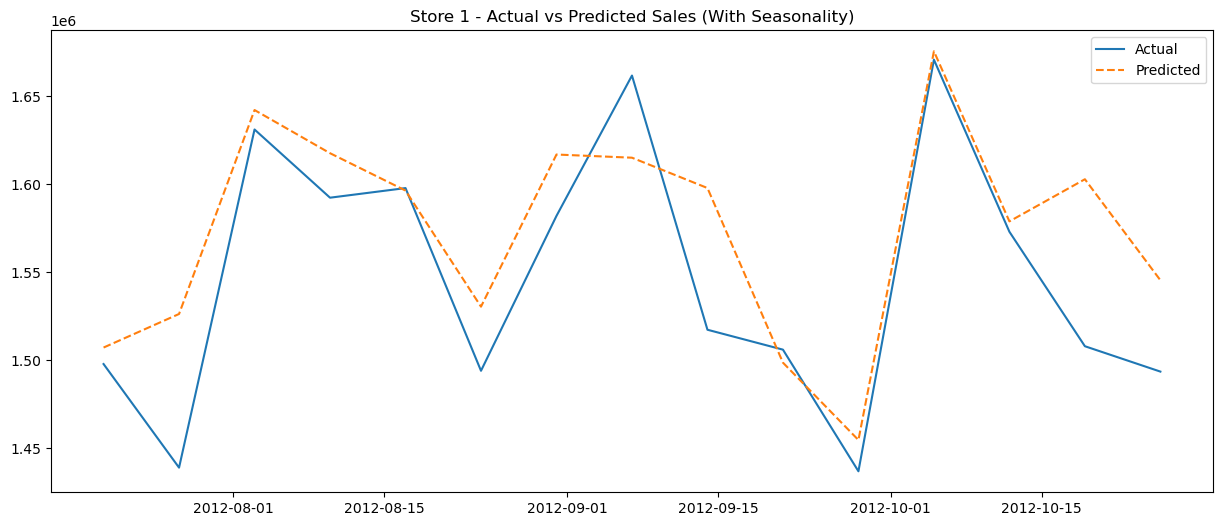

In [354]:
test = test.copy()
test['Predicted'] = preds_reduced

plt.figure(figsize=(15, 6))
plt.plot(test['Date'], test['Weekly_Sales'], label='Actual')
plt.plot(test['Date'], test['Predicted'], label='Predicted', linestyle='--')
plt.legend()
plt.title("Store 1 - Actual vs Predicted Sales (With Seasonality)")
plt.show()


### Compare RMSE to the Average Sales

In [355]:
store1_avg_sales = store1_df['Weekly_Sales'].mean()

In [356]:
relative_error = (rmse / store1_avg_sales) * 100 
print("Relative_error:", relative_error.round(2),"%")

Relative_error: 2.92 %


- This model predicts weekly sales with about 5.6% error on average.
- This is quite good, especially in real-world sales forecasting where <10% error is generally acceptable.

### Plot Actual vs Predicted

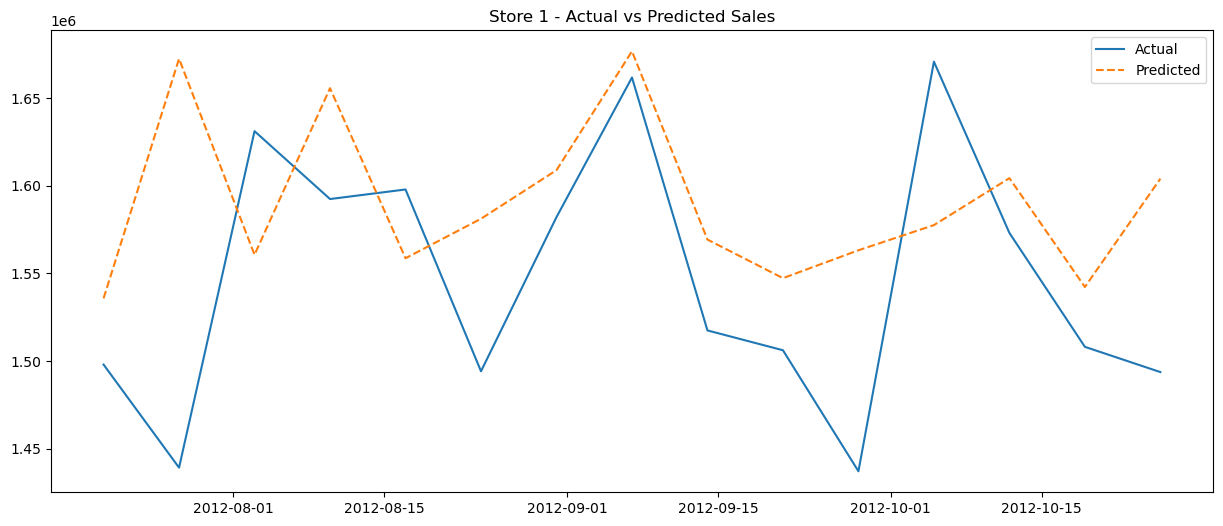

In [357]:
test = test.copy()
test['Predicted'] = preds

plt.figure(figsize=(15, 6))
plt.plot(test['Date'], test['Weekly_Sales'], label='Actual')
plt.plot(test['Date'], test['Predicted'], label='Predicted', linestyle='--')
plt.legend()
plt.title("Store 1 - Actual vs Predicted Sales")
plt.show()


In [358]:
test.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Semester,Week,DayOfWeek,Lag_1,Lag_2,MA_4,Predicted
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,7,H2,29,4,1527014.04,1769854.16,1.583811e+06,1535725.375
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,7,H2,30,4,1497954.76,1527014.04,1.558487e+06,1672469.000
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908,2012,8,H2,31,4,1439123.71,1497954.76,1.523807e+06,1560602.875
131,1,2012-08-10,1592409.97,0,85.05,3.494,221.958433,6.908,2012,8,H2,32,4,1631135.79,1439123.71,1.540156e+06,1655667.125
132,1,2012-08-17,1597868.05,0,84.85,3.571,222.038411,6.908,2012,8,H2,33,4,1592409.97,1631135.79,1.565134e+06,1558626.750


## Hypothesizing if CPI, unemployment, and fuel price have any impact on sales.

### Restructuring Dates as Sequential Numbers

In [359]:
store1_df = store1_df.sort_values('Date')  # Sort by date
store1_df['Week_Num'] = range(1, len(store1_df) + 1)

In [360]:
store1_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,Is_Pre_Is_Thanksgiving,Is_Is_SuperBowl,Is_Pre_Is_SuperBowl,Is_Is_LaborDay,Is_Pre_Is_LaborDay,Is_Is_Christmas,Is_Pre_Is_Christmas,Monthly_Avg_Sales,Lag_52,Week_Num
52,1,2011-02-04,1606629.58,0,42.27,2.989,212.566881,7.742,2011,2,...,0,0,1,0,0,0,0,1.599972e+06,1643690.90,1
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2,...,0,1,0,0,0,0,0,1.599972e+06,1641957.44,2
54,1,2011-02-18,1686842.78,0,57.36,3.045,213.247885,7.742,2011,2,...,0,0,0,0,0,0,0,1.599972e+06,1611968.17,3
55,1,2011-02-25,1456800.28,0,62.90,3.065,213.535609,7.742,2011,2,...,0,0,0,0,0,0,0,1.599972e+06,1409727.59,4
56,1,2011-03-04,1636263.41,0,59.58,3.288,213.823333,7.742,2011,3,...,0,0,0,0,0,0,0,1.576844e+06,1554806.68,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9,...,0,0,0,0,0,0,0,1.530595e+06,1394561.83,87
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,2012,10,...,0,0,0,0,0,0,0,1.561397e+06,1630989.95,88
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,2012,10,...,0,0,0,0,0,0,0,1.561397e+06,1493525.93,89
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,...,0,0,0,0,0,0,0,1.561397e+06,1502562.78,90


### Selecting Features and Target

- I am hypothesizing that CPI, Unemployment, Fuel_Price, and Date_Num may impact sales

In [361]:
features = ['Week_Num', 'CPI', 'Unemployment', 'Fuel_Price']
target = 'Weekly_Sales'


### Train/Test Split

In [362]:
X = store1_df[features]
y = store1_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # time-based split

### Fit Linear Regression

In [363]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [364]:
y_pred = lr_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 99049.52
R² Score: -0.4697


- <b>RMSE</b> of $124,240 means the model’s predictions deviate from the actual weekly sales by an average of about $124,240. It's not bad, since the aveerage weekly sales is $1,555,264.
- R² Score: -1.4322: This is a very big red flag. 
- R² (coefficient of determination) tells us how much of the variance in sales is explained by the model. 
- A score of:
- 1 = perfect prediction
- 0 = model predicts no better than the mean
- Negative = model is worse than predicting the average every time!

- This means that the model is worse than guessing the average sales each time. That means the regression model is not capturing the pattern in the data at all — it’s likely misspecified or the features are not linearly related to the target.

### Check Coefficients

In [365]:
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': lr_model.coef_})
print(coefficients)

        Feature    Coefficient
0      Week_Num   -8981.799024
1           CPI   92680.737129
2  Unemployment  127663.233530
3    Fuel_Price -146254.205668


### Standardizing the features

- Linear regression can perform poorly when input variables are on very different scales. Using StandardScaler from sklearn is used to solve this.

In [366]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [367]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [368]:
# Train
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, preds)

print(f"New RMSE: {rmse:.2f}")
print(f"New R² Score: {r2:.4f}")

New RMSE: 124765.60
New R² Score: -0.2942


### Checking for Multicolinearity

- <b>Multicollinearity</b> occurs when two or more independent features (variables) in a regression model are highly correlated with each other.

- <b>Why it’s a problem:</b>
- Makes it hard to determine the individual effect of each variable.
- Inflates the standard errors of the coefficients.
- Leads to unstable or misleading coefficients.
- Reduces the model’s interpretability and predictive reliability.

### Checking Variation of Inflation

In [369]:
# Create DataFrame from scaled data
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = features
vif_data['VIF'] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print(vif_data)


        Feature        VIF
0      Week_Num  25.100307
1           CPI  25.345895
2  Unemployment   3.864854
3    Fuel_Price   1.092339


### Plotting Residuals

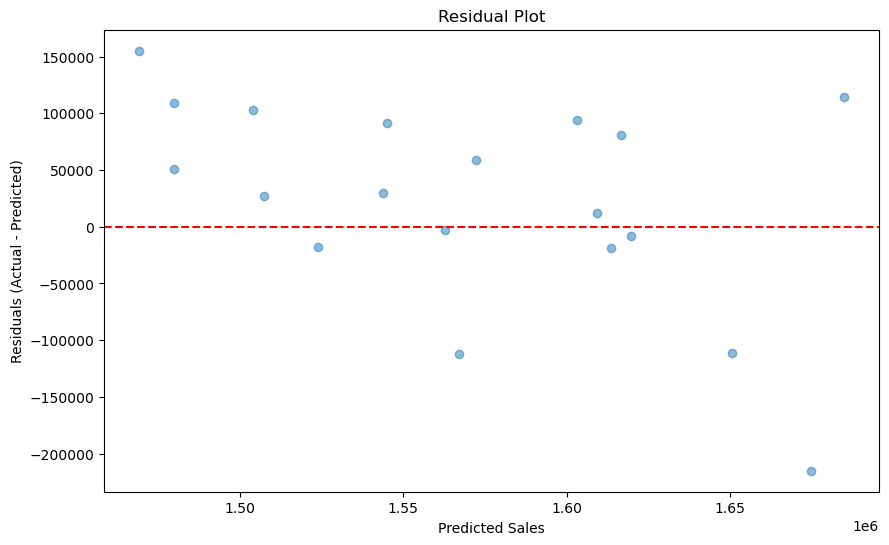

In [370]:
residuals = y_test - preds

plt.figure(figsize=(10, 6))
plt.scatter(preds, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


In [371]:
# 👇 Features with high VIF (> 5) are typically considered problematic, So I removed the week_num column

# 👇 Define only the features with lower VIF
features = ['CPI', 'Unemployment', 'Fuel_Price']

# 👇 Drop rows with missing values in these columns
store1_df = store1_df.dropna(subset=features + ['Weekly_Sales'])

# 👇 Create feature matrix (X) and target vector (y)
X = store1_df[features]
y = store1_df['Weekly_Sales']

# 👇 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 👇 Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 👇 Predict on test set
y_pred = model.predict(X_test)

# 👇 Evaluate model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 👇 Print metrics
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.4f}")


✅ RMSE: 124744.45
✅ R² Score: -1.3312


### Standardizing without Week-num column

In [372]:
# Standardizing the features
scaler_2 = StandardScaler()
X_scaled_2 = scaler_2.fit_transform(X)


####  Variation of Inflation after removing Week-num feature (because of multicolinearity).

In [373]:
#Creating DataFrame from scaled data
X_scaled_2_df = pd.DataFrame(X_scaled_2, columns=features)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = features
vif_data['VIF'] = [variance_inflation_factor(X_scaled_2_df.values, i) for i in range(X_scaled_2_df.shape[1])]

print(vif_data)


        Feature       VIF
0           CPI  3.661381
1  Unemployment  3.760882
2    Fuel_Price  1.055074


In [374]:

# Assume 'store1_df' is already your DataFrame with only Store 1
store1_lr_df = store1_df.sort_values('Date').copy()

# --- 1. Date Feature Engineering ---
store1_lr_df['Date'] = pd.to_datetime(store1_lr_df['Date'])
store1_lr_df['Month'] = store1_lr_df['Date'].dt.month
store1_lr_df['Year'] = store1_lr_df['Date'].dt.year
store1_lr_df['WeekOfYear'] = store1_lr_df['Date'].dt.isocalendar().week
store1_lr_df['IsHoliday'] = store1_lr_df['Holiday_Flag'].astype(int)

# --- 2. Lag Features ---
store1_lr_df['Lag_1'] = store1_lr_df['Weekly_Sales'].shift(1)
store1_lr_df['Lag_2'] = store1_lr_df['Weekly_Sales'].shift(2)

# --- 3. Moving Average Features ---
store1_lr_df['MA_4'] = store1_lr_df['Weekly_Sales'].rolling(window=4).mean()
store1_lr_df['MA_8'] = store1_lr_df['Weekly_Sales'].rolling(window=8).mean()

# --- 4. Drop rows with NaN from lag/MA ---
store1_lr_df.dropna(inplace=True)

# --- 5. Define Features and Target ---
features_lr = ['CPI', 'Unemployment', 'Fuel_Price',
            'Month', 'Year', 'WeekOfYear', 'IsHoliday',
            'Lag_1', 'Lag_2', 'MA_4', 'MA_8']
target_lr = 'Weekly_Sales'

X_lr = store1_lr_df[features_lr]
y_lr = store1_lr_df[target_lr]

# Standardizing the features
scaler_lr = StandardScaler()
X_scaled_lr = scaler_lr.fit_transform(X_lr)

# --- 6. Train-Test Split ---
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_scaled_lr, y_lr, test_size=0.2, random_state=42)

# --- 7. Train Linear Regression Model ---
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)

# --- 8. Make Predictions ---
preds_lr = model_lr.predict(X_test_lr)

# --- 9. Evaluate ---
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, preds_lr))
r2_lr = r2_score(y_test_lr, preds_lr)

print(f"✅ RMSE using Linear Regression: {rmse_lr:,.2f}")
print(f"✅ R² Score using Linear Regression: {r2_lr:.4f}")


✅ RMSE using Linear Regression: 135,392.49
✅ R² Score using Linear Regression: 0.3287


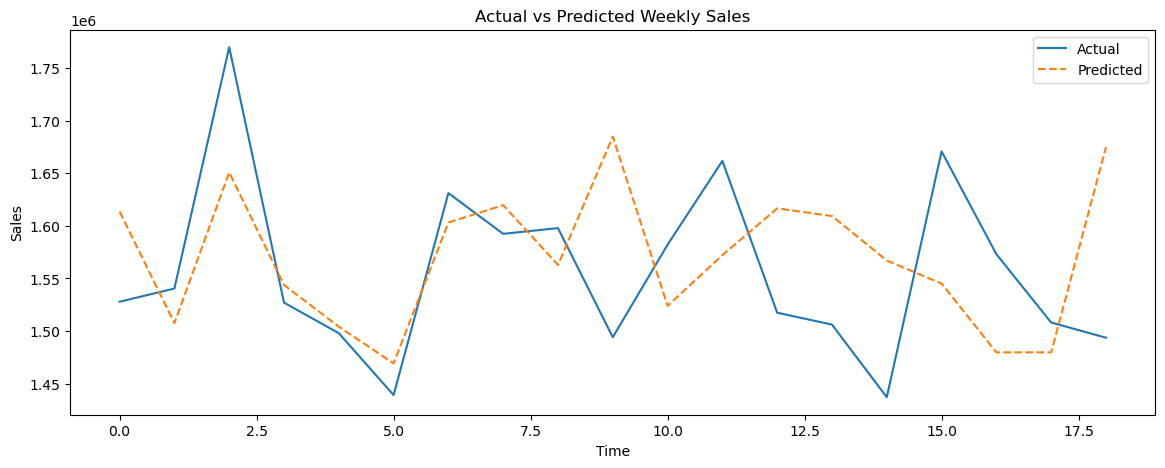

In [375]:

plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(preds, label='Predicted', linestyle='--')
plt.title("Actual vs Predicted Weekly Sales")
plt.xlabel("Time")
plt.ylabel("Sales")
plt.legend()
plt.show()


### Plot showing Trend of Weekly Sales against Time

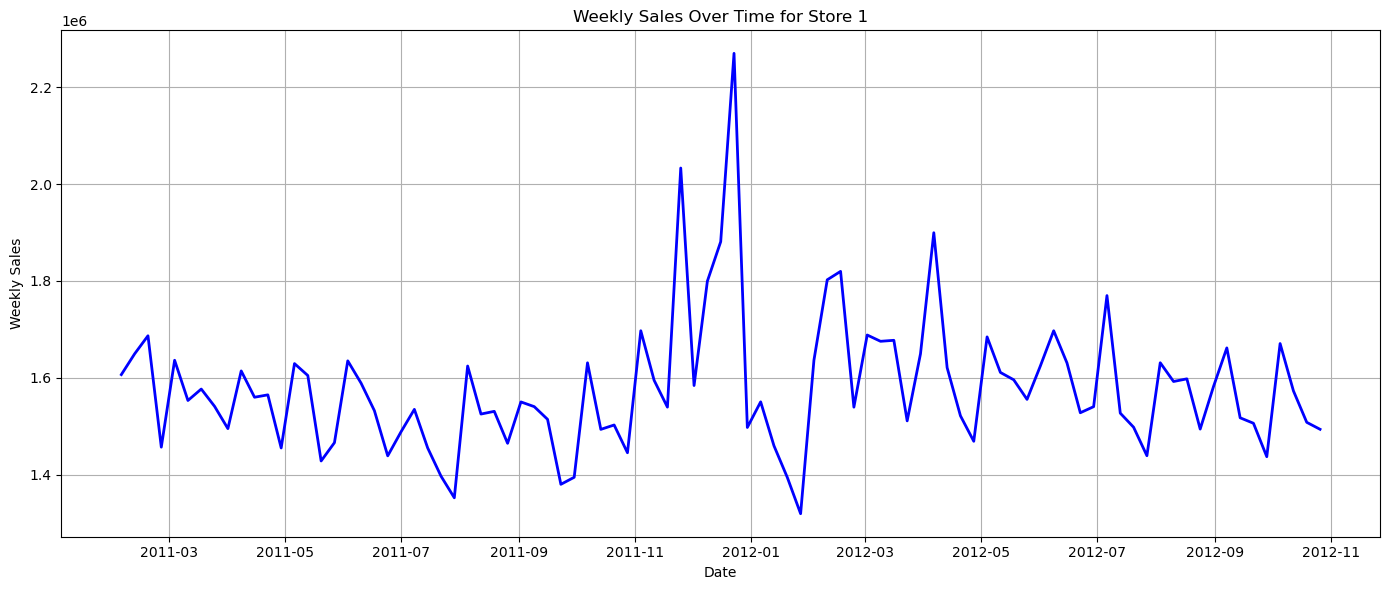

In [376]:
# Plot
plt.figure(figsize=(14, 6))
plt.plot(store1_df['Date'], store1_df['Weekly_Sales'], color='blue', linewidth=2)

plt.title('Weekly Sales Over Time for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


### Correlation Heatmap

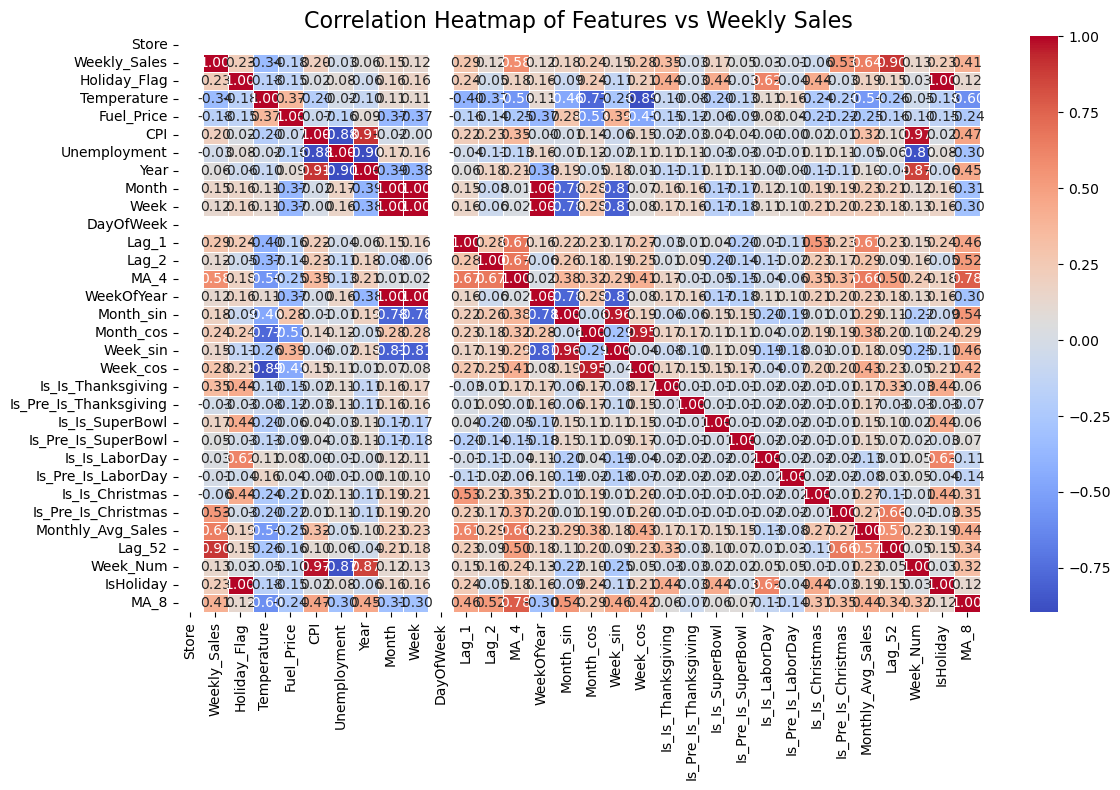

In [377]:

numeric_df = store1_lr_df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set figure size
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Heatmap of Features vs Weekly Sales", fontsize=16)

plt.tight_layout()
plt.show()
